 **BUILDING SELF ATTENTION FROM SCRATCH** : 
 LINK FOR THE PAPER -https://arxiv.org/pdf/1706.03762
---



Lets just code using numpy :

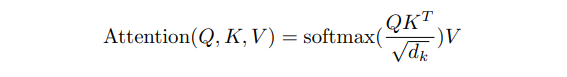

In [108]:
import numpy as np

In [109]:
import torch
import torch.nn as nn

In [110]:
#suppose we have 4 words : MY NAME IS PRANAY -> Length of sentence = 4
Len=4
dm_k=8
dm_q=8
dm_v=8
#query, key and Value
Q= np.random.randn(Len,dm_q) 
K= np.random.randn(Len,dm_k)
V =np.random.randn(Len,dm_v)

In [111]:
print("Q:\n", Q ,"K\n" ,K, "V\n" ,V) #VECTOR OF SIZE 8 FOR EACH WORD
Q.shape,K.shape,V.shape

Q:
 [[-0.64167693  0.5774143  -0.65982084  0.77376508 -0.40848643  2.01579085
   0.1524123   0.02296152]
 [ 0.72966981 -2.57955423  2.21432575  0.01022589 -0.13943605  0.88084684
  -1.08572122 -0.79579216]
 [-0.051024    1.07276929  1.73656852  0.18967246  0.53352385 -1.17506381
  -0.02284758 -0.03905315]
 [ 1.11294236 -0.38032299  0.54814844  0.1164068  -0.11611517  0.71228209
   0.02424501 -0.21493018]] K
 [[ 7.61357892e-01  1.54154341e+00 -1.08464063e+00 -1.00619384e-01
   1.03875835e+00  3.47065685e-01 -1.40904619e+00  9.95305405e-01]
 [-1.42168204e-02  1.14191264e+00 -9.14773386e-01  1.44134075e-01
  -6.65223315e-01 -1.92367955e+00 -1.86953648e+00 -8.02615349e-01]
 [-2.51928187e-01 -5.77374916e-01  4.86787891e-01 -3.20556027e-01
   4.25204520e-01  6.34331514e-01  2.68949900e+00 -1.07829364e-03]
 [ 7.72331118e-01 -6.08623692e-01  7.90163308e-01  9.81382258e-01
  -8.02911408e-01 -2.59631649e-01  1.15630953e+00 -5.24397181e-01]] V
 [[-1.15044409 -0.97690088  0.4716616  -1.45585215  1

((4, 8), (4, 8), (4, 8))

In [112]:
attention =np.matmul(Q,K.T)
attention=attention/dm_k**0.5 #  #normalizing the values
#attention =   np.matmul(attention,V) 
#attention= torch.tensor(attention)
attention,attention.shape #scaled

(array([[ 0.3969581 , -0.89299766,  0.27362256, -0.22634906],
        [-1.74128054, -1.38357182, -0.01398426,  1.03887402],
        [-0.05234821,  0.58127663, -0.14210213,  0.26048595],
        [-0.16499779, -0.74265734,  0.22507685,  0.59660108]]),
 (4, 4))

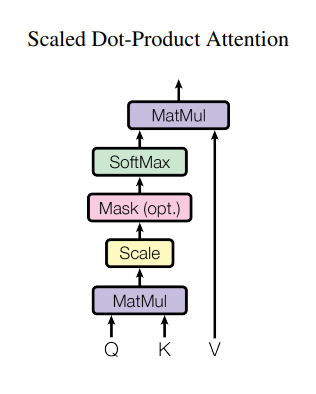

Now we also need to add Masking : To ensure words dont get context from words generated in future



In [113]:
mask= np.tril(np.ones((Len,Len))) #lower triangular matrix
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [114]:
mask[mask==0]= -np.infty

mask[mask==1]=0

mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [115]:
masked_attention = attention + mask #adding mask to the attention:M 
masked_attention

array([[ 0.3969581 ,        -inf,        -inf,        -inf],
       [-1.74128054, -1.38357182,        -inf,        -inf],
       [-0.05234821,  0.58127663, -0.14210213,        -inf],
       [-0.16499779, -0.74265734,  0.22507685,  0.59660108]])

In [116]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=-1).T

In [117]:
new_attention= softmax(masked_attention)
new_attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.11786226, 0.58848567, 0.        , 0.        ],
       [0.63807062, 4.19815748, 0.24065701, 0.        ],
       [0.57009294, 1.11707288, 0.347426  , 0.41345524]])

In [118]:
new_attention = np.matmul(attention,V)
new_attention ,new_attention.shape #output of the attention layer

(array([[-0.55256247, -0.37641739,  0.43193385, -1.23165914,  1.40065365,
          0.06582148, -1.46731517, -0.51431097],
        [ 0.31574087,  0.76545557, -2.26447313, -0.40063806, -0.06337146,
          3.49224707, -2.3780523 ,  0.75096351],
        [ 0.01575584, -0.0997767 , -0.43316049,  0.35480714, -0.55084393,
         -0.05169193,  1.31647716,  0.27091928],
        [-0.69615964, -0.59289496, -1.2479836 , -1.3566106 ,  1.2268213 ,
          1.27024607, -0.33667774, -0.07900215]]),
 (4, 8))